In [1]:
import os
from dotenv import load_dotenv

load_dotenv()  # .env 파일에서 환경변수 로드
api_key = os.getenv("OPENAI_API_KEY")  # 없으면 None

if not api_key:
    raise ValueError("OPENAI_API_KEY가 없습니다. .env 또는 환경변수 설정 확인 필요")

In [4]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

response = client.responses.create(
    model="gpt-4o-mini",
    input="Write a one-sentence bedtime story about a unicorn."
)

print(response.output_text)

As the moonlit meadow shimmered with magic, a kind-hearted unicorn sprinkled stardust over sleeping flowers, ensuring their dreams would be as colorful and vibrant as her own.


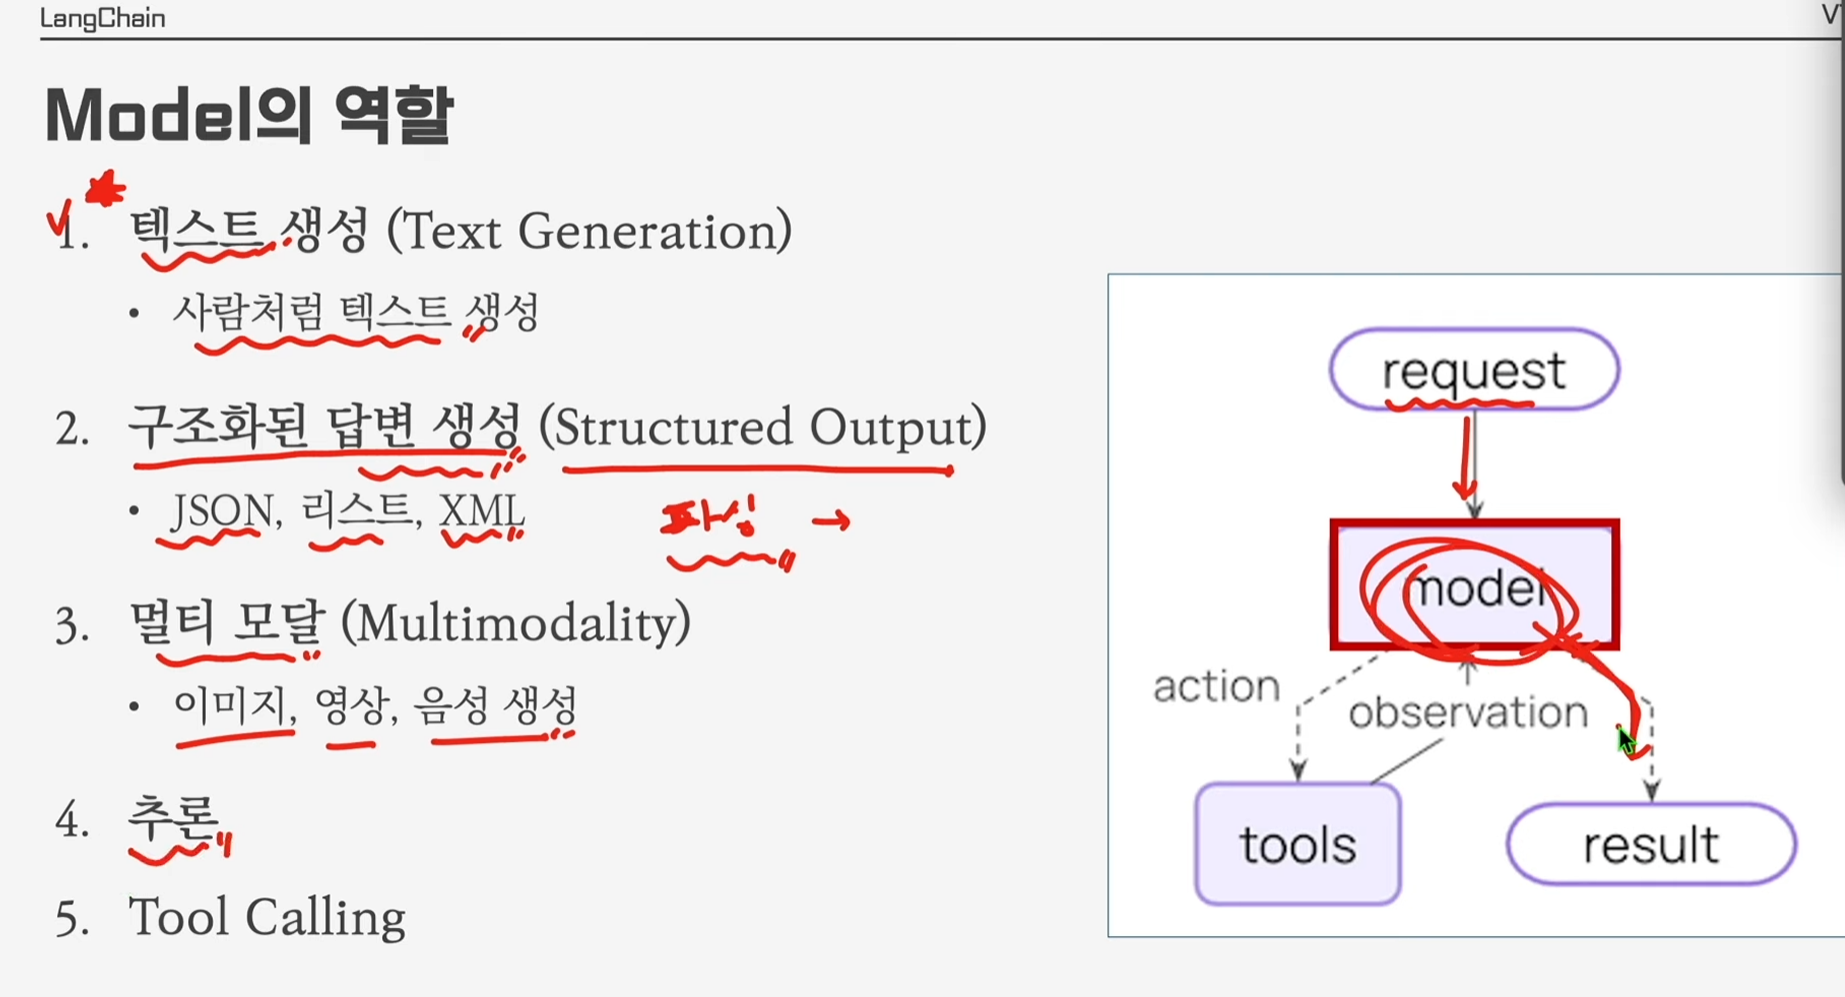

### Text Generation

In [3]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-5-nano", api_key=api_key)
response = model.invoke("현재 어떤 llm 모델이 가장 성능이 좋아?")

print(response.content)

짧게 정리하면, “현재 어떤 하나의 모델이 항상 최고다”라고 말하기는 어렵고, 용도에 따라 달라집니다. 다만 상황에 따라 많이 쓰이는 최상위 계층은 다음과 같이 구분할 수 있습니다.

- 일반 대화/다목적 추론
  - 상용: OpenAI GPT-4o, Anthropic Claude 4/5, Google Gemini Pro/Ultra
  - 특징: 다중 모달(이미지 포함) 가능성, 뛰어난 추론 능력, 안전성/제어 기능도 좋음

- 코드 작성/개발 보조
  - 상용: GPT-4(특히 코드 관련 프롬프트에서 강함), Code Llama, StarCoder류 등
  - 특징: 코드 이해도와 생성 품질이 중요할 때 강력

- 다중 모달/시각 정보 활용
  - 상용: GPT-4o, Gemini Ultra 계열, Claude 5 등
  - 특징: 텍스트 + 이미지/비디오 처리에서 성능 우위 가능

- 오픈소스/커스터마이즈가 필요한 경우
  - Llama 3 (메타), Mistral 7B/12B/70B 계열, Falcon 등
  - 특징: 라이선스 자유, 직접 튜닝/배포 가능하지만 대형 상용 모델에 비해 성능 차이가 있을 수 있음

참고로 벤치마크와 성능은 평가 방법, 데이터, 태스크에 따라 크게 달라집니다. 예를 들어 수학 문제 풀이, 코딩, 안전성 제어, 기억/다중 턴 대화 등 각 영역에서 강점이 다릅니다. 또 새로운 모델이 자주 등장하는 빠른 분야라 최신 정보를 확인하는 것이 중요합니다.

원하시면 사용 목적(언어/도메인, 예산, 서비스 형태(클라우드/온프렘), 응답 속도, 프라이버시 요구 등)을 알려 주세요. 그에 맞춰:
- 추천 후보 모델 2~3종
- 비교 평가 계획(벤치마크 목록, 샘플 데이터, 평가 지표)
- 샘플 테스트 시나리오를 함께 제시해 드리겠습니다.


In [ ]:
# 토큰 사용량 확인
response.usage_metadata

{'input_tokens': 16,
 'output_tokens': 2090,
 'total_tokens': 2106,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 1536}}

In [7]:
# 모델 파라미터
model = init_chat_model("gpt-4o-mini",
                        api_key=api_key,
                        temperature=0.7, # 창의성
                        # max_tokens=1000,  # 응답 최대길이 제한->비용관리 및 출력통제 (토큰)
                        timeout=30,     # 응답 대기시간제한 -> 시스템의 무한대기 방지(초)
                        max_retries=3    # 재시도 횟수 -> 일시적 오류에 대한 복원력 강화
                        ) 
response = model.invoke("넌 누구냐?")
response

AIMessage(content='저는 인공지능 언어 모델인 ChatGPT입니다. 여러분의 질문에 답하고 정보를 제공하기 위해 여기 있습니다. 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 12, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-CtRVTDOAP6h6gmtFvZmkHdIjwtdUN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b7d10-ffe0-72a1-870e-93b0b00b6fce-0', usage_metadata={'input_tokens': 12, 'output_tokens': 34, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
# response.usage_metadata
print(response.content)

저는 인공지능 언어 모델인 ChatGPT입니다. 여러분의 질문에 답하고 정보를 제공하기 위해 여기 있습니다. 무엇을 도와드릴까요?


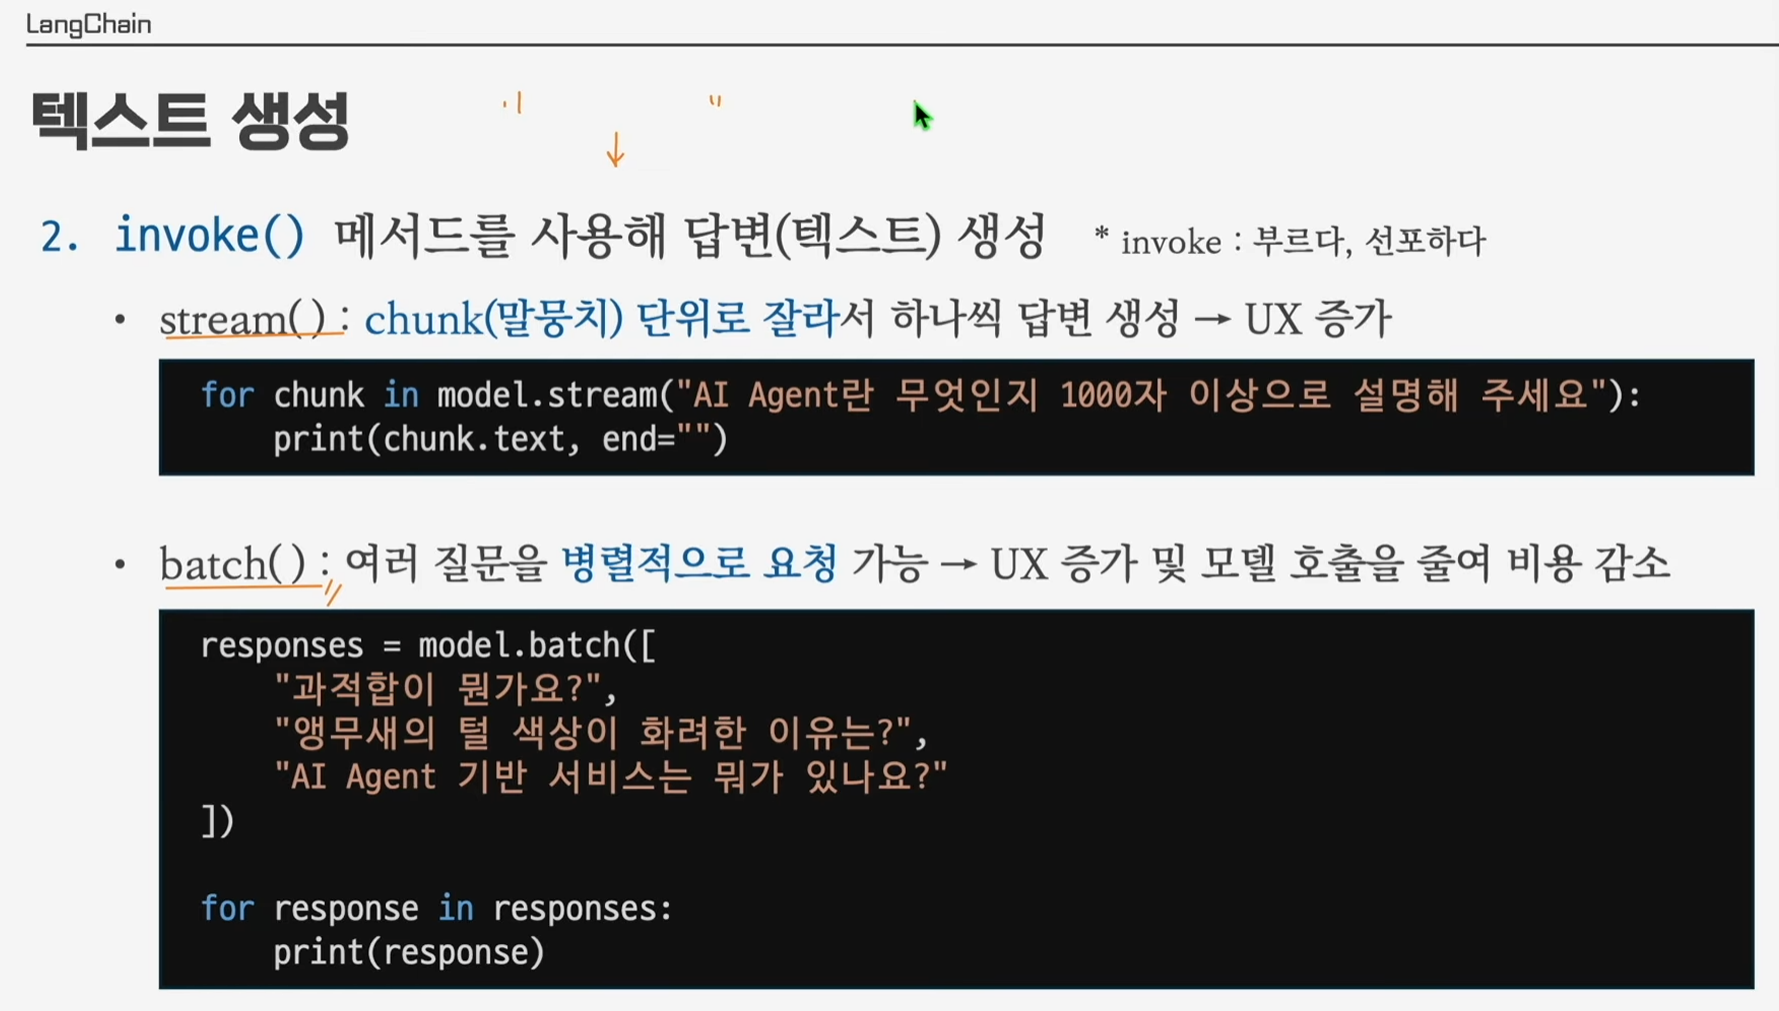

### stream()

In [11]:
for chunk in model.stream("AI에이전트가 무엇인지 1000자 이상으로 설명해줘"):
    print(chunk.text, end='')

AI 에이전트(Artificial Intelligence Agent)는 인공지능 기술을 활용하여 특정 작업이나 임무를 수행하는 소프트웨어 또는 시스템을 의미합니다. 이러한 에이전트는 다양한 환경에서 자율적으로 행동하고, 학습하며, 의사결정을 내리는 능력을 갖추고 있습니다. AI 에이전트는 일반적으로 다음과 같은 특성을 가지고 있습니다.

1. **자율성**: AI 에이전트는 주어진 목표를 달성하기 위해 독립적으로 행동할 수 있는 능력을 가지고 있습니다. 이는 사용자의 지시 없이도 스스로 판단하고 행동할 수 있음을 의미합니다.

2. **지능**: AI 에이전트는 데이터에서 패턴을 인식하고, 경험을 통해 학습하며, 상황에 따라 최적의 결정을 내릴 수 있는 능력을 보유하고 있습니다. 이는 머신러닝, 딥러닝 등의 기술을 통해 이루어집니다.

3. **상호작용**: 대부분의 AI 에이전트는 인간과 상호작용할 수 있는 기능을 제공합니다. 이는 자연어 처리(NLP) 기술을 통해 이루어지며, 사용자의 질문에 답하거나 요청에 반응할 수 있습니다.

4. **정보 처리**: AI 에이전트는 대량의 데이터를 수집하고 분석하여 유용한 정보를 추출하는 능력이 있습니다. 이를 통해 더욱 정확한 예측이나 결정을 내릴 수 있습니다.

AI 에이전트는 다양한 분야에서 활용되고 있습니다. 예를 들어, 고객 서비스에서는 챗봇 형태로 사용되어 고객의 질문에 실시간으로 응답합니다. 금융 분야에서는 시장 트렌드를 분석하고 투자 결정을 지원하는 역할을 수행합니다. 또한, 자율주행차, 스마트 홈 시스템, 의료 진단 보조 시스템 등에서도 AI 에이전트의 역할이 점점 확대되고 있습니다.

AI 에이전트의 발전은 인간의 삶에 많은 긍정적인 영향을 미치고 있지만, 동시에 몇 가지 도전 과제가 존재합니다. 첫째, 윤리적 문제입니다. AI 에이전트가 내리는 결정이 공정하고 투명해야 하며, 편향된 데이터로 인해 잘못된 결정을 내리지 않도록 주의해야 합니다. 둘째, 보안 문제입니다. AI 시스템이 해킹이나 악용될 

### batch()

In [9]:
responses = model.batch([
    "인공지능이란 무엇인가?",
    "머신러닝과 딥러닝의 차이점은?",
    "자연어처리의 주요 응용 분야는?"
])

for resp in responses:
    print(resp)

content='인공지능(Artificial Intelligence, AI)은 기계나 컴퓨터 시스템이 인간의 지능을 모방하여 학습, 추론, 문제 해결, 이해 및 자연어 처리 등의 작업을 수행할 수 있도록 하는 기술을 말합니다. 인공지능은 크게 두 가지로 나눌 수 있습니다.\n\n1. **약한 인공지능(Weak AI)**: 특정 작업을 수행하는 데 특화된 인공지능으로, 예를 들어 음성 인식, 이미지 인식, 추천 시스템 등이 있습니다. 이러한 시스템은 특정한 문제를 해결하는 데 최적화되어 있으며, 일반적인 인지 능력을 갖추고 있지 않습니다.\n\n2. **강한 인공지능(Strong AI)**: 인간과 유사한 수준의 인지 능력을 갖춘 인공지능으로, 다양한 상황에서 스스로 학습하고 문제를 해결할 수 있는 능력을 의미합니다. 현재로서는 강한 인공지능은 이론적인 개념에 가깝고, 실제로 구현된 사례는 없습니다.\n\n인공지능의 발전은 머신러닝(기계 학습), 딥러닝(심층 학습), 자연어 처리(NLP) 등의 기술을 기반으로 하며, 다양한 산업에서 활용되고 있습니다. 예를 들면, 의료 진단, 자율주행차, 고객 서비스 챗봇, 금융 거래 분석 등이 있습니다. 인공지능은 우리의 생활을 편리하게 만들고, 새로운 가능성을 열어주는 중요한 기술로 자리잡고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 317, 'prompt_tokens': 15, 'total_tokens': 332, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_p

In [10]:
for resp in responses:
    print(resp.content)

인공지능(Artificial Intelligence, AI)은 기계나 컴퓨터 시스템이 인간의 지능을 모방하여 학습, 추론, 문제 해결, 이해 및 자연어 처리 등의 작업을 수행할 수 있도록 하는 기술을 말합니다. 인공지능은 크게 두 가지로 나눌 수 있습니다.

1. **약한 인공지능(Weak AI)**: 특정 작업을 수행하는 데 특화된 인공지능으로, 예를 들어 음성 인식, 이미지 인식, 추천 시스템 등이 있습니다. 이러한 시스템은 특정한 문제를 해결하는 데 최적화되어 있으며, 일반적인 인지 능력을 갖추고 있지 않습니다.

2. **강한 인공지능(Strong AI)**: 인간과 유사한 수준의 인지 능력을 갖춘 인공지능으로, 다양한 상황에서 스스로 학습하고 문제를 해결할 수 있는 능력을 의미합니다. 현재로서는 강한 인공지능은 이론적인 개념에 가깝고, 실제로 구현된 사례는 없습니다.

인공지능의 발전은 머신러닝(기계 학습), 딥러닝(심층 학습), 자연어 처리(NLP) 등의 기술을 기반으로 하며, 다양한 산업에서 활용되고 있습니다. 예를 들면, 의료 진단, 자율주행차, 고객 서비스 챗봇, 금융 거래 분석 등이 있습니다. 인공지능은 우리의 생활을 편리하게 만들고, 새로운 가능성을 열어주는 중요한 기술로 자리잡고 있습니다.
머신러닝(Machine Learning)과 딥러닝(Deep Learning)은 인공지능(AI) 분야의 두 가지 주요 기술이지만, 그 접근 방식과 구조에는 몇 가지 중요한 차이점이 있습니다.

1. **정의**:
   - **머신러닝**: 데이터를 분석하여 패턴을 학습하고 예측하는 알고리즘의 집합입니다. 머신러닝은 명시적으로 프로그래밍하지 않고도 컴퓨터가 특정 작업을 수행할 수 있도록 하는 기술입니다.
   - **딥러닝**: 머신러닝의 하위 분야로, 인공 신경망(Artificial Neural Networks)을 사용하여 데이터를 처리하고 학습합니다. 특히, 여러 층의 뉴런을 통해 복잡한 데이터 표현을 학습하는 데 강점을 가지고 있습니다.

2. **데

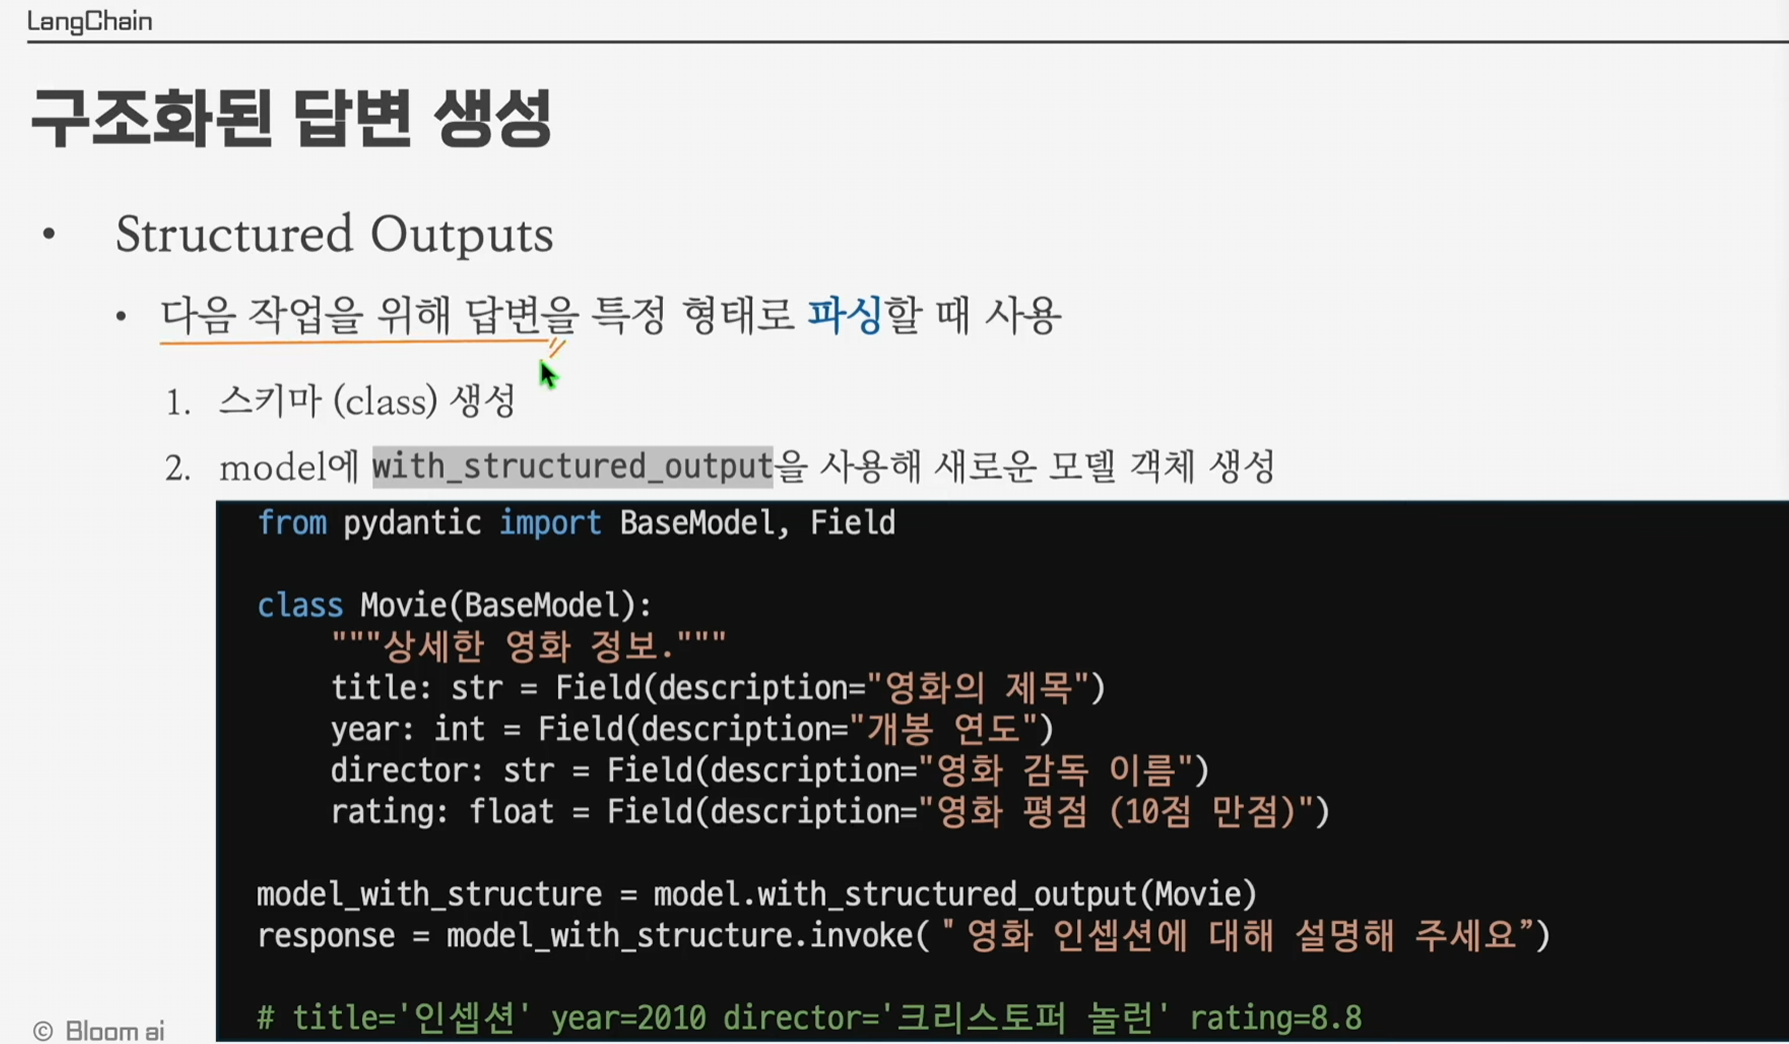

In [29]:
from pydantic import BaseModel, Field
class Movieinfo(BaseModel):
    """상세한 영화 정보"""
    title: str = Field(..., description="영화 제목")
    year: int = Field(..., description="개봉 연도")
    director : str = Field(..., description="감독 이름")
    rating : float = Field(..., description="평균 평점 (0.0 ~ 10.0)")

model_with_structure = model.with_structured_output(Movieinfo)
model_with_structure.invoke("영화 인셉션에 대해 알려줘")

Movieinfo(title='Inception', year=2010, director='Christopher Nolan', rating=8.8)

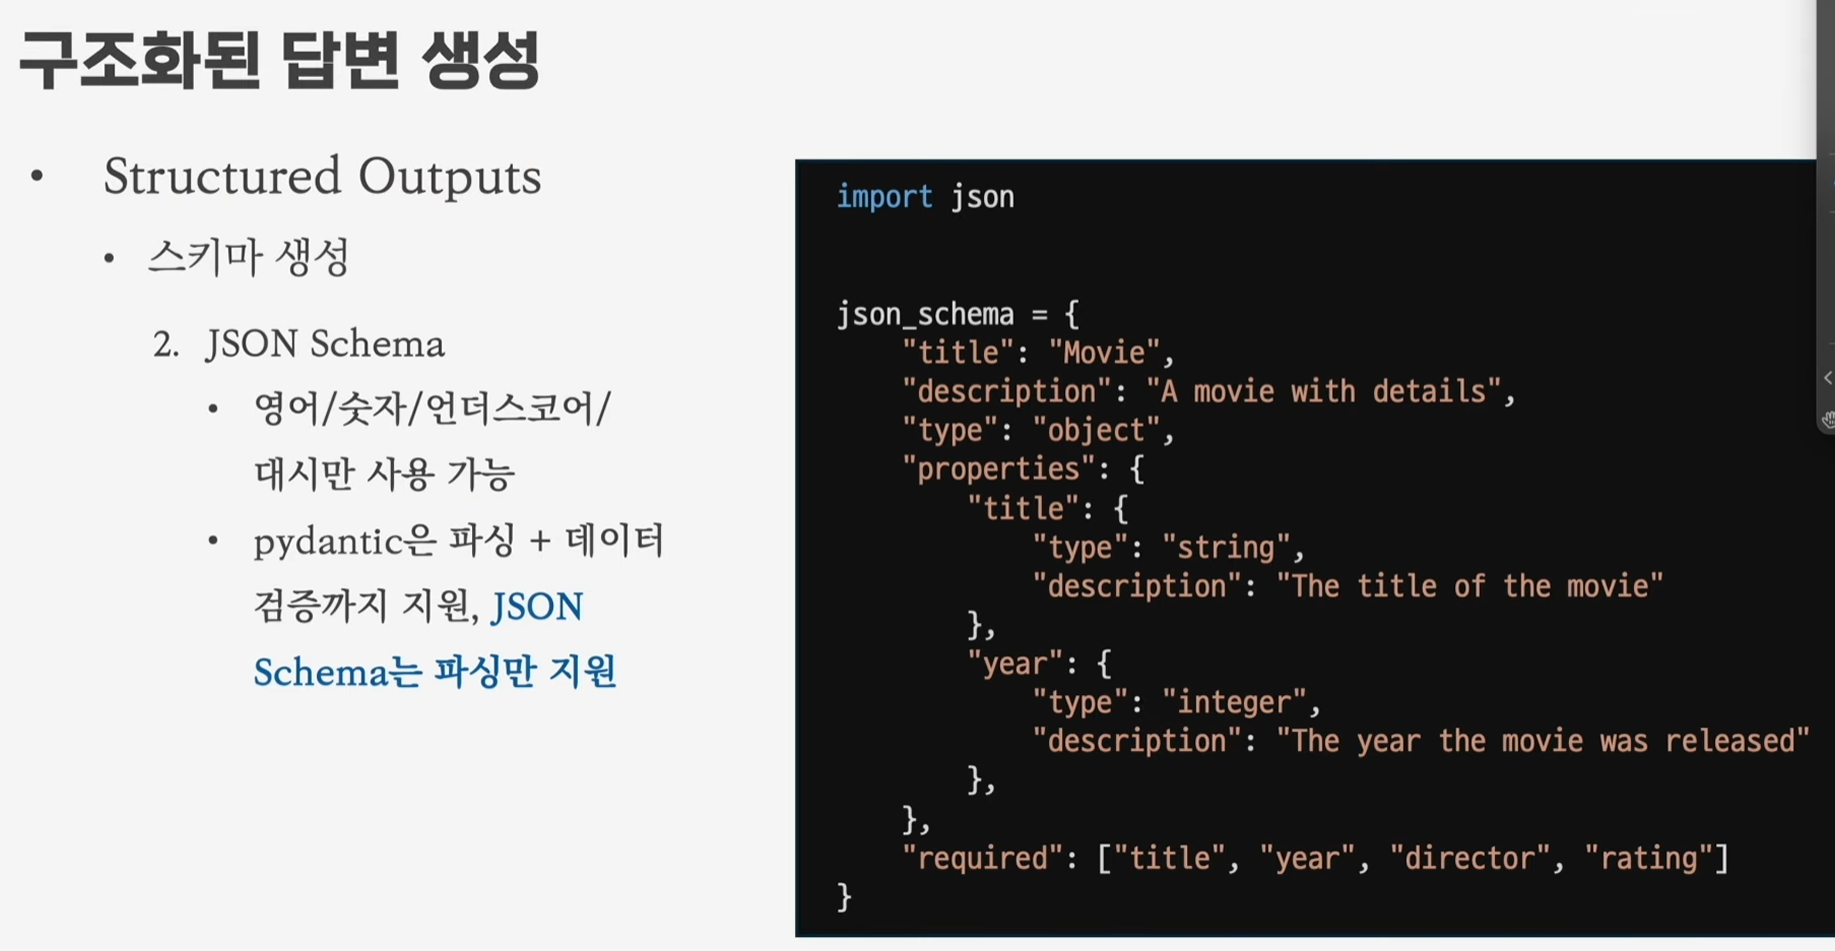

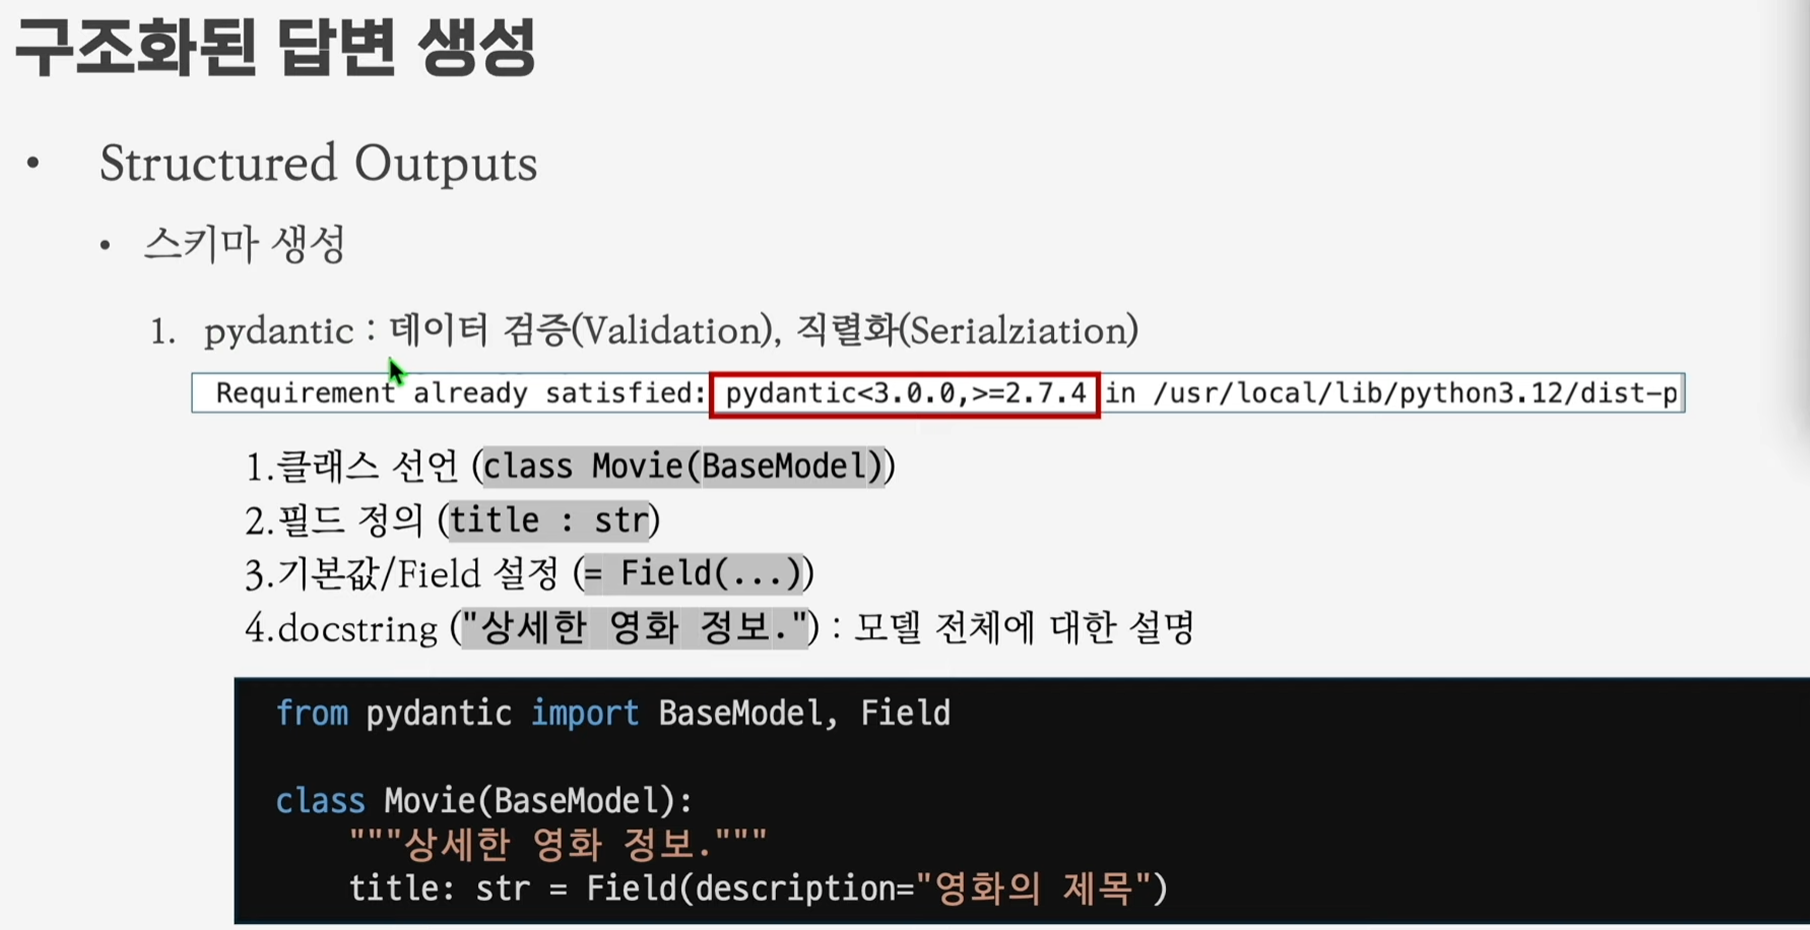